In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# loading data Credit Card Transaction in India as 'CCT_India.csv'
df = pd.read_csv('CCT_India.csv')

In [4]:
df.head()

,index,City,Date,Card Type,Exp Type,Gender,Amount
0,0,"Delhi, India",29-Oct-14,Gold,Bills,F,82475
1,1,"Greater Mumbai, India",22-Aug-14,Platinum,Bills,F,32555
2,2,"Bengaluru, India",27-Aug-14,Silver,Bills,F,101738
3,3,"Greater Mumbai, India",12-Apr-14,Signature,Bills,F,123424
4,4,"Bengaluru, India",5-May-15,Gold,Bills,F,171574


In [5]:
# checking any missing values in dataset

missing_values_count = df.isnull().sum()
missing_values_count

index        0
City         0
Date         0
Card Type    0
Exp Type     0
Gender       0
Amount       0
dtype: int64

In [6]:
# running above code we can see no missing values.
# i want to run code to check total percent % of missing values.

total_cells = np.product(df.shape)
total_missing_values = missing_values_count.sum()

percent_missing = (total_missing_values/total_cells) * 100

percent_missing

0.0

In [7]:
# lets create pivote table to see total spending by gender.

pivot = df.pivot_table(index=['Gender'], values=['Amount'], aggfunc='sum')

pivot

,Amount
Gender,
F,2205311030
M,1869522343


In [8]:
# lets look into the time period of total spending start and end.

df.Date.max()

'9-Sep-14'

In [9]:
df.Date.min()

'1-Apr-14'

In [10]:
# sorted date column to have beter understanding of start and end date.
# Start Date is OcT-04-2013 End Date is May-26-2015 as you can see below output.

df['Date'] = pd.to_datetime(df['Date'])
df.sort_values(by='Date')

,index,City,Date,Card Type,Exp Type,Gender,Amount
15464,15464,"Lakshmeshwar, India",2013-10-04,Silver,Bills,F,83905
9427,9427,"Bengaluru, India",2013-10-04,Gold,Fuel,F,29929
9418,9418,"Ahmedabad, India",2013-10-04,Silver,Entertainment,M,89155
9244,9244,"Delhi, India",2013-10-04,Silver,Fuel,M,203722
1521,1521,"Delhi, India",2013-10-04,Gold,Food,M,281924
...,...,...,...,...,...,...,...
13424,13424,"Delhi, India",2015-05-26,Platinum,Entertainment,F,245806
24598,24598,"Hyderabad, India",2015-05-26,Gold,Grocery,F,113730
9980,9980,"Delhi, India",2015-05-26,Platinum,Entertainment,F,200932
6224,6224,"Bengaluru, India",2015-05-26,Signature,Bills,M,52986


In [11]:
# spending by exp type by Gender.

pivot2 = df.pivot_table(index=['Exp Type', 'Gender'], values=['Amount'], aggfunc='sum')
pivot2

Amount
Exp Type      Gender           
Bills         F       580035469
              M       327037004
Entertainment F       358663333
              M       367774203
Food          F       452817279
              M       371906730
Fuel          F       392282421
              M       396853400
Grocery       F       365646998
              M       352560925
Travel        F        55865530
              M        53390081

In [13]:
pivot3 = df.pivot_table(index=['Card Type'], values=['Amount'], aggfunc='sum')
pivot3 

,Amount
Card Type,
Gold,984539536
Platinum,1007639019
Signature,1013041105
Silver,1069613713


### Visualization By chart 

In [49]:
# changing the type of date to string
df['Date'] = df['Date'].astype(str)

In [50]:
# split Date column into 3 columns 
df['year_split'] = df.Date.str.split('-')

In [52]:
df['Year'] = df.year_split.str.get(0)
df['Month'] = df.year_split.str.get(1)
df['Day'] = df.year_split.str.get(2)

In [53]:
df.head()

,index,City,Date,Card Type,Exp Type,Gender,Amount,year_split,Year,Month,Day
0,0,"Delhi, India",2014-10-29,Gold,Bills,F,82475,"[2014, 10, 29]",2014,10,29
1,1,"Greater Mumbai, India",2014-08-22,Platinum,Bills,F,32555,"[2014, 08, 22]",2014,08,22
2,2,"Bengaluru, India",2014-08-27,Silver,Bills,F,101738,"[2014, 08, 27]",2014,08,27
3,3,"Greater Mumbai, India",2014-04-12,Signature,Bills,F,123424,"[2014, 04, 12]",2014,04,12
4,4,"Bengaluru, India",2015-05-05,Gold,Bills,F,171574,"[2015, 05, 05]",2015,05,05


In [110]:
# changing Year, Month, Day type into Integer.
df['Year'] = df['Year'].astype(int)
df['Month'] = df['Month'].astype(int)
df['Day'] = df['Day'].astype(int)

In [112]:
# subset of df by year.
df_year13 = df[(df.Year == 2013)]

df_year13.head()

,index,City,Date,Card Type,Exp Type,Gender,Amount,year_split,Year,Month,Day
11,11,"Greater Mumbai, India",2013-12-07,Signature,Bills,F,278036,"[2013, 12, 07]",2013,12,7
19,19,"Greater Mumbai, India",2013-11-09,Platinum,Bills,F,735566,"[2013, 11, 09]",2013,11,9
23,23,"Ahmedabad, India",2013-10-11,Gold,Bills,F,668568,"[2013, 10, 11]",2013,10,11
32,32,"Ahmedabad, India",2013-11-24,Platinum,Bills,F,227702,"[2013, 11, 24]",2013,11,24
40,40,"Delhi, India",2013-10-27,Platinum,Bills,F,678842,"[2013, 10, 27]",2013,10,27


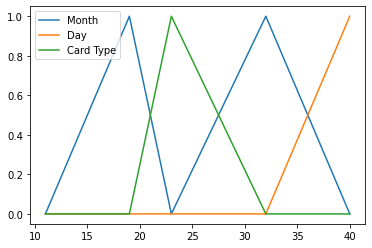

In [136]:
# visualizing by Month, day and card Type.
plt.plot(df_year13.Month.head() == 11, data=df_year13)
plt.plot(df_year13.Day.head() == 27, data=df_year13)
plt.plot(df_year13['Card Type'].head() == 'Gold', data=df_year13)
plt.legend(['Month', 'Day', 'Card Type'])
plt.show()

In [139]:
# Total City 
df_year13.City.nunique()

598

In [148]:
# Minimum Amount paid by Exp Tpe in Year 2013
exp_min = df_year13.pivot_table(index=['Exp Type'], values=['Amount'], aggfunc='min')
exp_min

,Amount
Exp Type,
Bills,2179
Entertainment,1074
Food,1175
Fuel,1207
Grocery,1578
Travel,1070


In [149]:
# Maximum Amount paid by Exp Tpe in Year 2013
exp_max = df_year13.pivot_table(index=['Exp Type'], values=['Amount'], aggfunc='max')
exp_max

,Amount
Exp Type,
Bills,996754
Entertainment,299794
Food,299751
Fuel,299905
Grocery,298476
Travel,296138


In [169]:
# Total spending in Year by gender using Card Type.
gender_card = df.pivot_table(index=['Year'], columns =['Card Type', 'Gender'], values=['Amount'], aggfunc='sum')
gender_card

Amount                                                         \
Card Type       Gold              Platinum             Signature              
Gender             F          M          F          M          F          M   
Year                                                                          
2013        81850717   62889838   82725228   73238948   91458192   69766904   
2014       313983292  286704784  312746134  287330968  328474907  278275571   
2015       127098174  112012731  136468867  115128874  128072050  116993481   

                                 
Card Type     Silver             
Gender             F          M  
Year                             
2013        77387771   74326286  
2014       365057922  282140455  
2015       159987776  110713503

# DashBoard

In [187]:

%%html
<div class='tableauPlaceholder' id='viz1671936707911' style='position: relative'><noscript><a href='#'><img alt='Credit Cart Transaction ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Cr&#47;CreditCardTransactionsInIndia&#47;Dashboard1&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='CreditCardTransactionsInIndia&#47;Dashboard1' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Cr&#47;CreditCardTransactionsInIndia&#47;Dashboard1&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /><param name='language' value='en-US' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1671936707911');                    var vizElement = divElement.getElementsByTagName('object')[0];                    if ( divElement.offsetWidth > 800 ) { vizElement.style.minWidth='420px';vizElement.style.maxWidth='650px';vizElement.style.width='100%';vizElement.style.minHeight='587px';vizElement.style.maxHeight='887px';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';} else if ( divElement.offsetWidth > 500 ) { vizElement.style.minWidth='420px';vizElement.style.maxWidth='650px';vizElement.style.width='100%';vizElement.style.minHeight='587px';vizElement.style.maxHeight='887px';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';} else { vizElement.style.width='100%';vizElement.style.height='977px';}                     var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>